In [22]:
import matplotlib.pyplot as plt
import matplotlib as mpl
from random import randint

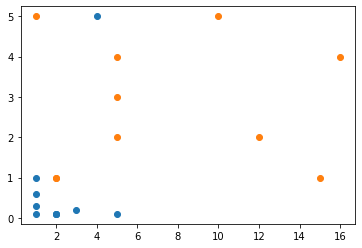

In [23]:
# for non spam

# average time required to send a message out of 50
s_av_time = [.1, .1, 5, .6, .1, .1, 1, .2, .1, .3]
s_length = [1, 2, 4, 1, 5, 2, 1, 3, 2, 1]

# for spam
ns_av_time = [5, 1, 4, 2, 3, 1, 5, 2, 1, 4]
ns_length = [10, 15, 16, 12, 5, 2, 1, 5, 2, 5]

plt.scatter(s_length, s_av_time)
plt.scatter(ns_length, ns_av_time)

In [24]:
def classify(nx, ny) -> bool:
    non_spam = zip(ns_av_time, ns_length)
    spam = zip(s_av_time, s_length)

    n_dist, n_count = get_distance(nx, ny, non_spam)
    s_dist, s_count = get_distance(nx, ny, spam)

    # true if spam
    # false if non-spam

    return n_dist < s_dist


def get_distance(nx, ny, arr) -> float:
    """
    This function returns the distance between a point and the nearest point in the array.
    """
    inDistance = []
    for x, y in arr:
        if (d := hypotenuse(nx-x, ny-y)) >= 5:
            inDistance.append(d)

    return sum(inDistance) / len(inDistance), len(inDistance)


def hypotenuse(x, y) -> float:
    return ((x ** 2) + (y ** 2)) ** 0.5


In [25]:
def build_graph() -> None:
    """
    This function builds a graph of the points in the array.
    """

    for _ in range(5):
        x = randint(0, 100)
        y = randint(0, 100)

        if classify(x, y):
            s_av_time.append(x)
            s_length.append(y)

        else:
            ns_av_time.append(x)
            ns_length.append(y)


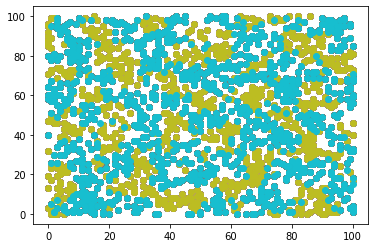

In [30]:

for _ in range(50):
    build_graph()

    plt.scatter(s_length, s_av_time)
    plt.scatter(ns_length, ns_av_time)


In [31]:
import pickle

with open(".\\data.pickle", "wb") as f:
    pickle.dump(
        {
            "spam": {"length": s_length, "time": s_av_time},
            "normal": {"length": ns_length, "time": ns_av_time}
        },
        f
    )
